In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.rcsetup

import os
import re

from scipy.stats import iqr

from lib.bounds_functions import beta_Haar, expressibility_bound

from lib.exponential_fitting import show_elbow_n, show_all_elbows, fit_exponential_n

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
def beta_Haar(n):
    return(1/(np.power(2,n-1)*(np.power(2,n)+1)))

def G(n, epsilon):
    return(beta_Haar(n)+epsilon*(epsilon+2*np.sqrt(beta_Haar(n))))

# Sonar QF

## Imports

In [3]:
path_2_results = 'results/sonar/linear/'

files = []

for file in os.listdir(path_2_results):
    if file.endswith(".csv"):
        files.append(os.path.join(path_2_results, file))

files.sort()

N_files = len(files)

In [4]:
path_2_results_full = 'results/sonar/full'

files_full = []

for file in os.listdir(path_2_results_full):
    if file.endswith(".csv"):
        files_full.append(os.path.join(path_2_results_full, file))

files_full.sort()

N_files = len(files_full)

In [7]:
x = np.arange(2,12+0.1,1)

In [8]:
means = np.zeros((len(files), len(x)))
medians = np.zeros((len(files), len(x)))
stds = np.zeros((len(files), len(x)))
iqrs = np.zeros((len(files), len(x)))

for file_id in range(len(files)):
    df = pd.read_csv(files[file_id], header=None)
    results = df.to_numpy()
    means[file_id] = results.mean(axis=1)
    stds[file_id] = results.std(axis=1)
    iqrs[file_id] = iqr(results, axis=1)
    medians[file_id] = np.median(results, axis=1)


means_full = np.zeros((len(files_full), len(x)))
medians_full = np.zeros((len(files_full), len(x)))
stds_full = np.zeros((len(files_full), len(x)))
iqrs_full = np.zeros((len(files), len(x)))

for file_id in range(len(files_full)):
    df = pd.read_csv(files_full[file_id], header=None)
    results = df.to_numpy()
    means_full[file_id] = results.mean(axis=1)
    stds_full[file_id] = results.std(axis=1)
    iqrs_full[file_id] = iqr(results, axis=1)
    medians_full[file_id] = np.median(results, axis=1)

In [9]:
y_range = (5*1e-7,1)

# Linear

## Means

In [10]:
x = np.array(x, dtype = float)
means_log = np.log2(means)

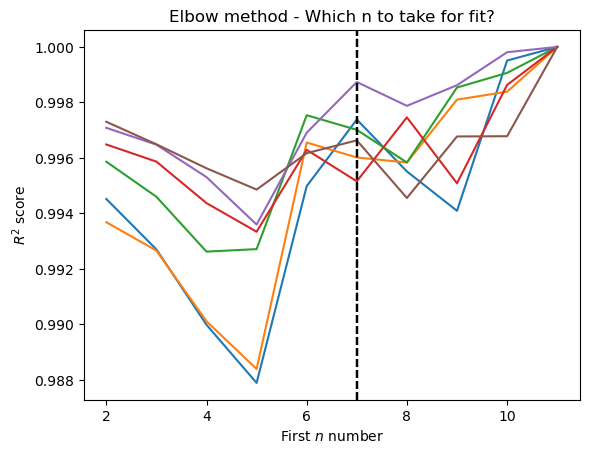

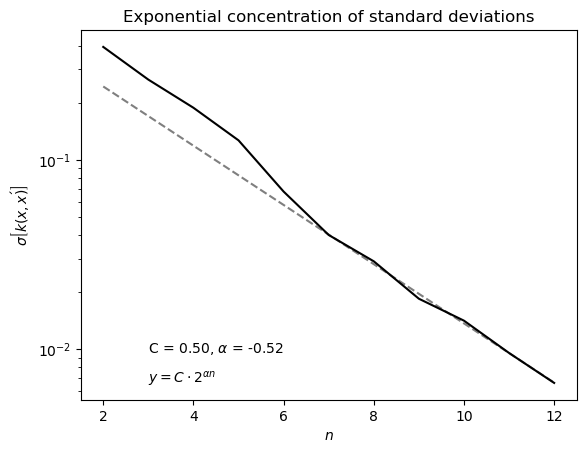

In [11]:
best_starting_qubit = show_all_elbows(means, best_qubit = 6)
alpha, C = fit_exponential_n(means[0],best_qubit=7)

In [12]:
path_2_fit_exports = 'results/sonar/fits/'

fit_data = np.zeros((means.shape[0],3))

for i in range(means.shape[0]):
    alpha, C = fit_exponential_n(means[i],best_qubit=7, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_means = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df.to_csv(path_2_fit_exports+'means_linear.csv', index=False)

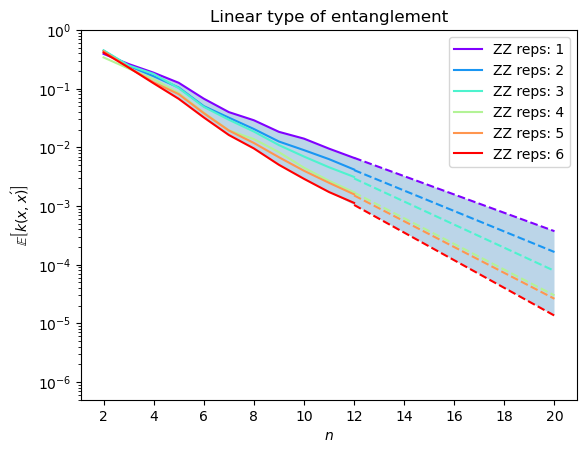

In [13]:
color = cm.rainbow(np.linspace(0, 1, df_means.shape[0]))

max_x = 20

x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

for i, c in enumerate(color):
   plt.plot(x,means[i], c=c, label = 'ZZ reps: '+str(int(df_means['reps'][i])))
   plt.plot(x_extended, df_means['C'][i]*np.power(2.0,df_means['alpha'][i]*x_extended), c=c, linestyle = '--')

plt.fill_between(x_full, np.concatenate((means[0][:-1],df_means['C'][0]*np.power(2.0,df_means['alpha'][0]*x_extended))), np.concatenate((means[-1][:-1],df_means['C'].iloc[-1]*np.power(2.0,df_means['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

plt.yscale('log')

plt.title('Linear type of entanglement')
plt.xlabel(r'$n$')
plt.xticks([int(i) for i in x_full if i%2==0])
plt.ylabel(r'$\mathbb{E}\left[k(x,x\')\right]$')
plt.ylim(y_range)
plt.legend()

#plt.savefig('imgs/sonar_means_all.pdf', transparent = True)
plt.show()

## Medians

In [14]:
x = np.array(x, dtype = float)
medians_log = np.log2(medians)

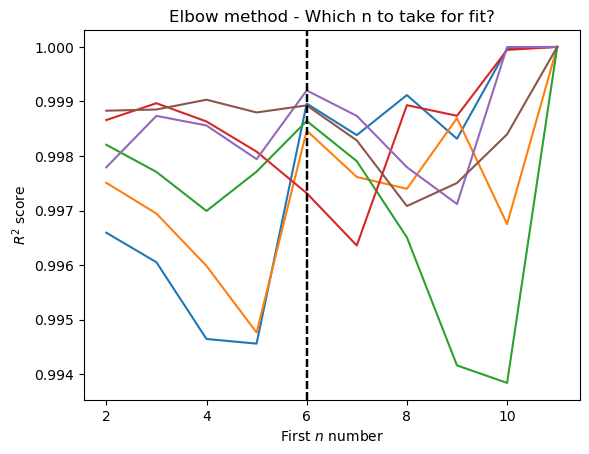

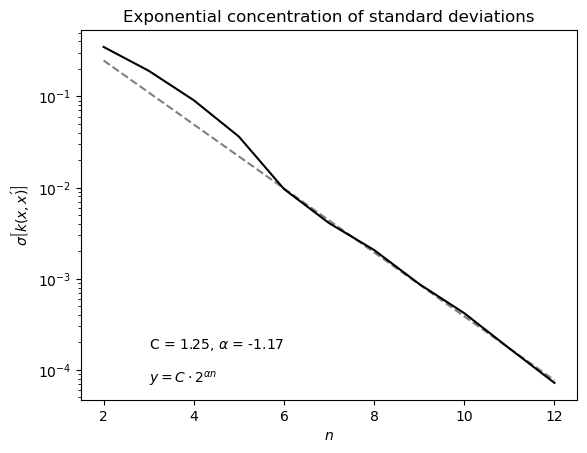

In [15]:
best_starting_qubit = show_all_elbows(medians, best_qubit = 5)
alpha, C = fit_exponential_n(medians[0],best_qubit=6)

In [16]:
path_2_fit_exports = 'results/sonar/fits/'

fit_data = np.zeros((medians.shape[0],3))

for i in range(medians.shape[0]):
    alpha, C = fit_exponential_n(medians[i],best_qubit=6, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_medians = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df.to_csv(path_2_fit_exports+'medians_linear.csv', index=False)

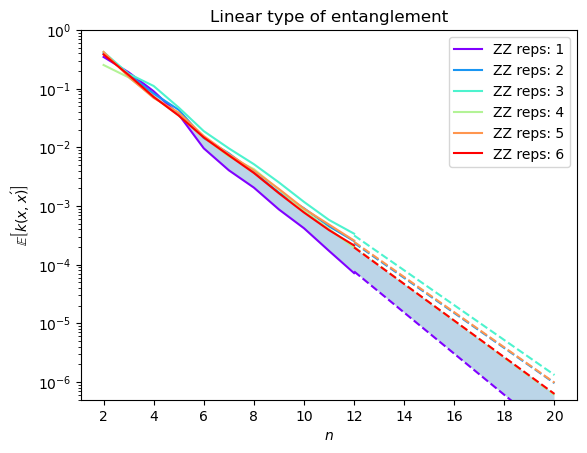

In [17]:
color = cm.rainbow(np.linspace(0, 1, df_medians.shape[0]))

max_x = 20

x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

for i, c in enumerate(color):
   plt.plot(x,medians[i], c=c, label = 'ZZ reps: '+str(int(df_medians['reps'][i])))
   plt.plot(x_extended, df_medians['C'][i]*np.power(2.0,df_medians['alpha'][i]*x_extended), c=c, linestyle = '--')

plt.fill_between(x_full, np.concatenate((medians[0][:-1],df_medians['C'][0]*np.power(2.0,df_medians['alpha'][0]*x_extended))), np.concatenate((medians[-1][:-1],df_medians['C'].iloc[-1]*np.power(2.0,df_medians['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

plt.yscale('log')

plt.title('Linear type of entanglement')
plt.xlabel(r'$n$')
plt.xticks([int(i) for i in x_full if i%2==0])
plt.ylabel(r'$\mathbb{E}\left[k(x,x\')\right]$')
plt.ylim(y_range)
plt.legend()

#plt.savefig('imgs/sonar_means_all.pdf', transparent = True)
plt.show()

## STDS

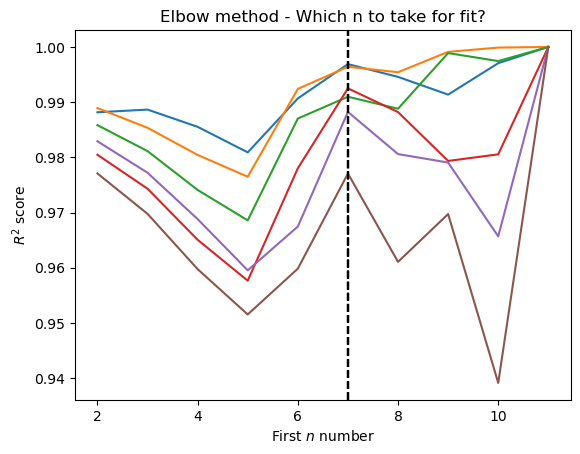

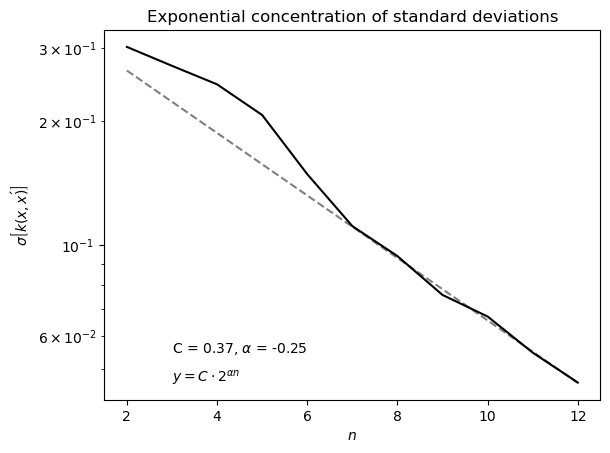

In [18]:
stds_log = np.log2(stds)

best_starting_qubit = show_all_elbows(stds, best_qubit = 6)
alpha, C = fit_exponential_n(stds[0],best_qubit=7)

In [19]:
fit_data = np.zeros((stds.shape[0],3))

for i in range(stds.shape[0]):
    alpha, C = fit_exponential_n(stds[i],best_qubit=7, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_stds = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df_stds.to_csv(path_2_fit_exports+'stds_linear.csv', index=False)

## IQRS

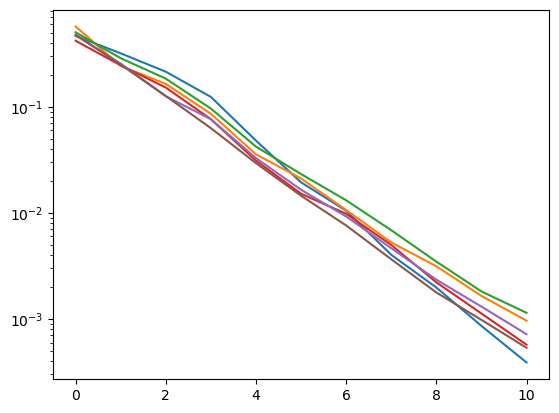

In [20]:
plt.plot(iqrs.T)
plt.yscale('log')
plt.show()

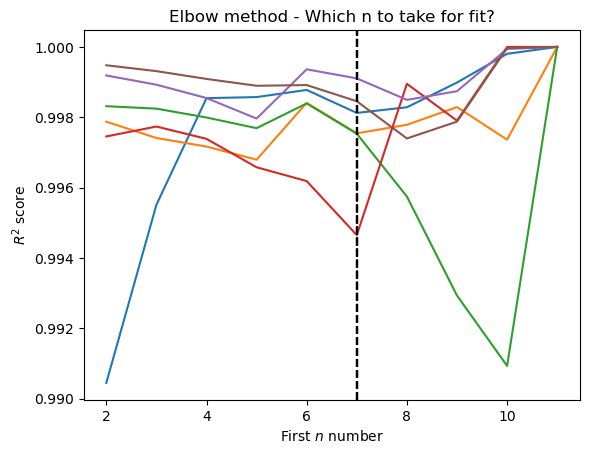

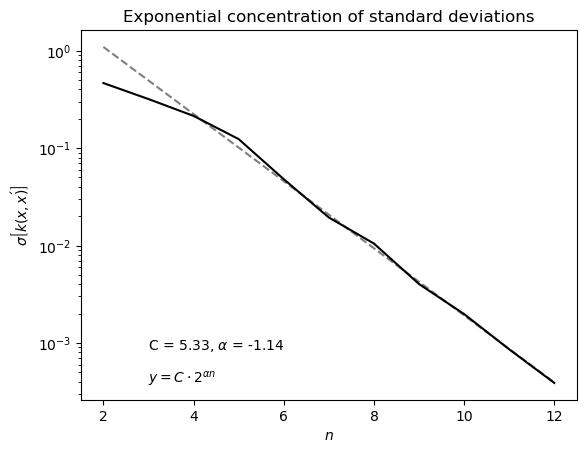

In [21]:
best_starting_qubit = show_all_elbows(iqrs, best_qubit = 6)
alpha, C = fit_exponential_n(iqrs[0],best_qubit=7)

In [22]:
fit_data = np.zeros((iqrs.shape[0],3))

for i in range(iqrs.shape[0]):
    alpha, C = fit_exponential_n(iqrs[i],best_qubit=7, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_iqrs = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df_iqrs.to_csv(path_2_fit_exports+'iqrs_linear.csv', index=False)

# full

## Means

In [23]:
x = np.array(x, dtype = float)
means_full_log = np.log2(means_full)

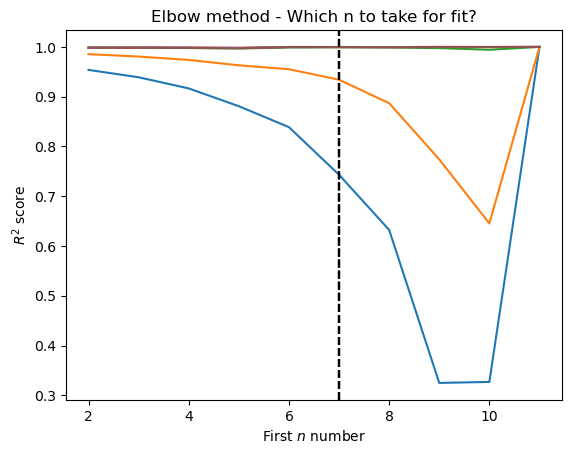

In [24]:
best_starting_qubit = show_all_elbows(means_full, best_qubit = 6)

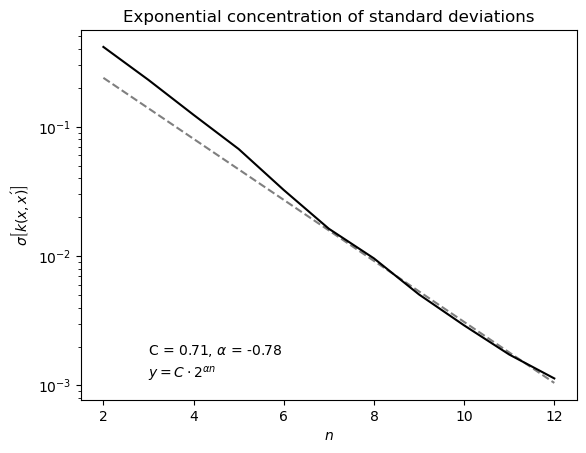

In [25]:
alpha, C = fit_exponential_n(means[5],best_qubit=7)

In [26]:
fit_data = np.zeros((means_full.shape[0],3))

for i in range(means_full.shape[0]):
    alpha, C = fit_exponential_n(means_full[i],best_qubit=7, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_full = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df_full.to_csv(path_2_fit_exports+'means_full.csv', index=False)

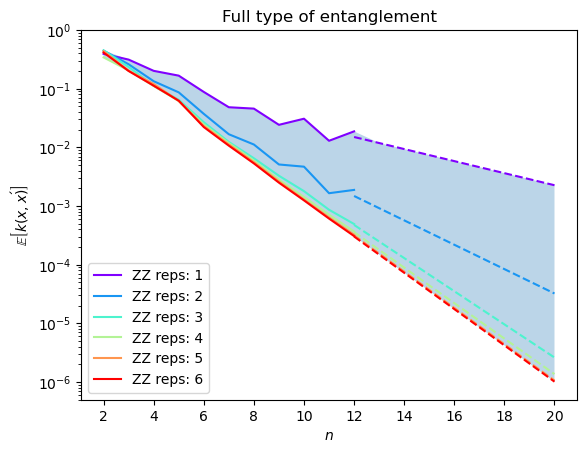

In [27]:
color = cm.rainbow(np.linspace(0, 1, df_full.shape[0]))

max_x = 20

x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

for i, c in enumerate(color):
   plt.plot(x,means_full[i], c=c, label = 'ZZ reps: '+str(int(df_full['reps'][i])))
   plt.plot(x_extended, df_full['C'][i]*np.power(2.0,df_full['alpha'][i]*x_extended), c=c, linestyle = '--')

plt.fill_between(x_full, np.concatenate((means_full.max(axis=0), df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended[1:]))),  np.concatenate(( means_full.min(axis=0), df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
#plt.fill_between(x_full, np.concatenate((means[0][:-1],df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended))), np.concatenate((means[-1][:-1],df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

plt.yscale('log')

plt.title('Full type of entanglement')
plt.xlabel(r'$n$')
plt.xticks([int(i) for i in x_full if i%2==0])
plt.ylabel(r'$\mathbb{E}\left[k(x,x\')\right]$')
plt.ylim(y_range)
plt.legend()

#plt.savefig('imgs/sonar_means_full_all.pdf', transparent = True)
plt.show()

## Medians

In [28]:
x = np.array(x, dtype = float)
medians_log = np.log2(medians_full)

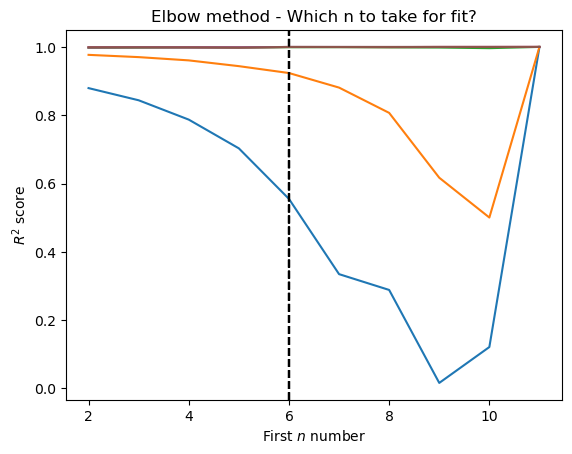

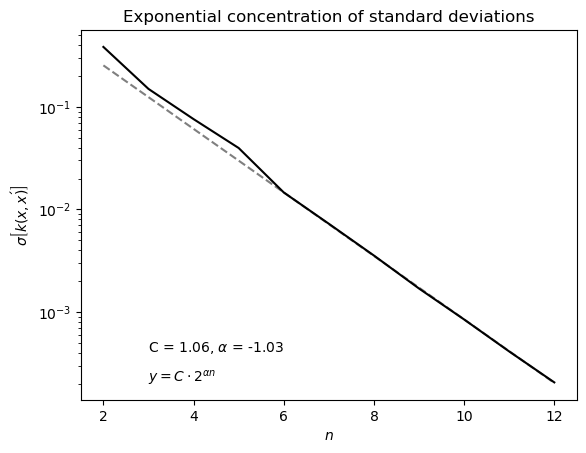

In [29]:
best_starting_qubit = show_all_elbows(medians_full, best_qubit = 5)
alpha, C = fit_exponential_n(medians_full[-1],best_qubit=6)

In [30]:
path_2_fit_exports = 'results/sonar/fits/'

fit_data = np.zeros((medians_full.shape[0],3))

for i in range(medians_full.shape[0]):
    alpha, C = fit_exponential_n(medians_full[i],best_qubit=6, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_medians_full = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df.to_csv(path_2_fit_exports+'medians_full.csv', index=False)

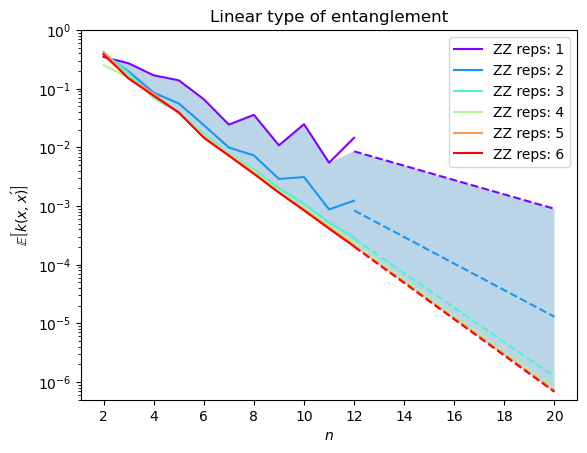

In [31]:
color = cm.rainbow(np.linspace(0, 1, df_medians_full.shape[0]))

max_x = 20

x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

for i, c in enumerate(color):
   plt.plot(x,medians_full[i], c=c, label = 'ZZ reps: '+str(int(df_medians_full['reps'][i])))
   plt.plot(x_extended, df_medians_full['C'][i]*np.power(2.0,df_medians_full['alpha'][i]*x_extended), c=c, linestyle = '--')

plt.fill_between(x_full, np.concatenate((medians_full[0][:-1],df_medians_full['C'][0]*np.power(2.0,df_medians_full['alpha'][0]*x_extended))), np.concatenate((medians_full[-1][:-1],df_medians_full['C'].iloc[-1]*np.power(2.0,df_medians_full['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

plt.yscale('log')

plt.title('Linear type of entanglement')
plt.xlabel(r'$n$')
plt.xticks([int(i) for i in x_full if i%2==0])
plt.ylabel(r'$\mathbb{E}\left[k(x,x\')\right]$')
plt.ylim(y_range)
plt.legend()

#plt.savefig('imgs/sonar_means_all.pdf', transparent = True)
plt.show()

## STDS

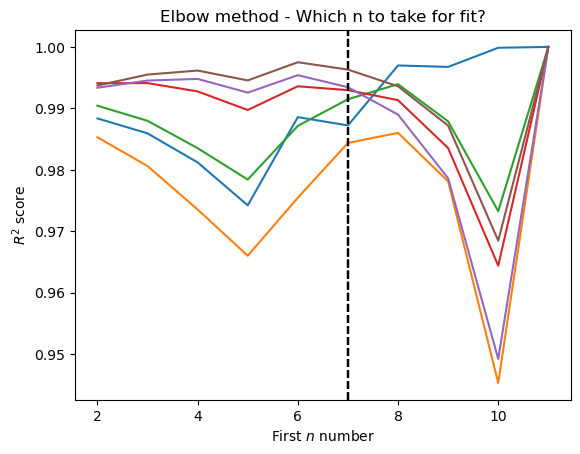

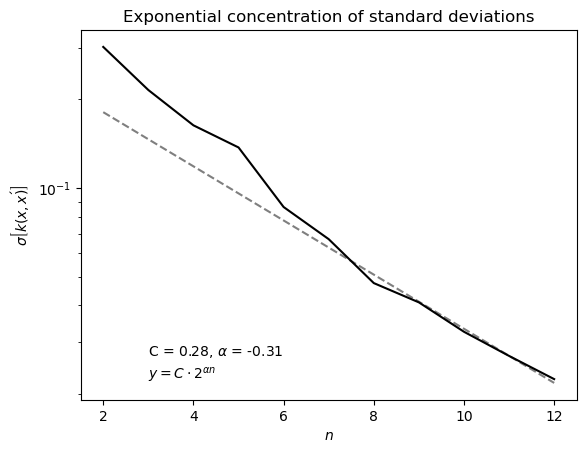

In [32]:
stds_full_log = np.log2(stds_full)

best_starting_qubit = show_all_elbows(stds_full, best_qubit = 6)
alpha, C = fit_exponential_n(stds_full[0],best_qubit=7)

In [33]:
fit_data = np.zeros((stds_full.shape[0],3))

for i in range(stds_full.shape[0]):
    alpha, C = fit_exponential_n(stds_full[i],best_qubit=7, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_stds_full = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df_stds_full.to_csv(path_2_fit_exports+'stds_full.csv', index=False)

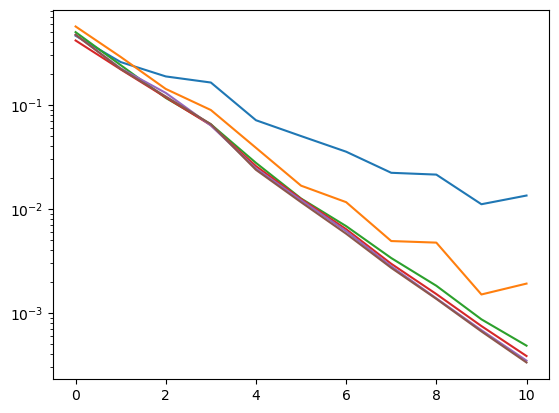

In [34]:
plt.plot(iqrs_full.T)
plt.yscale('log')
plt.show()

## IQRS

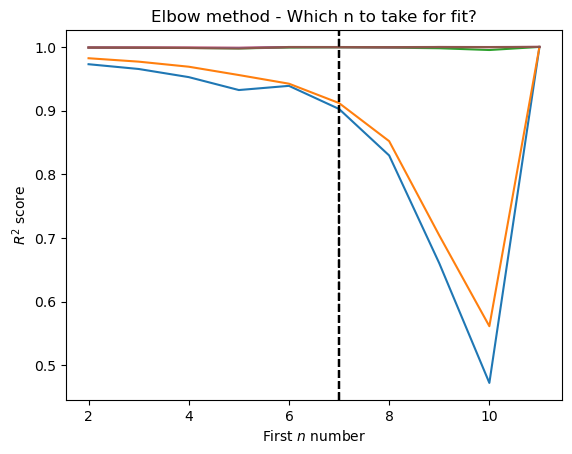

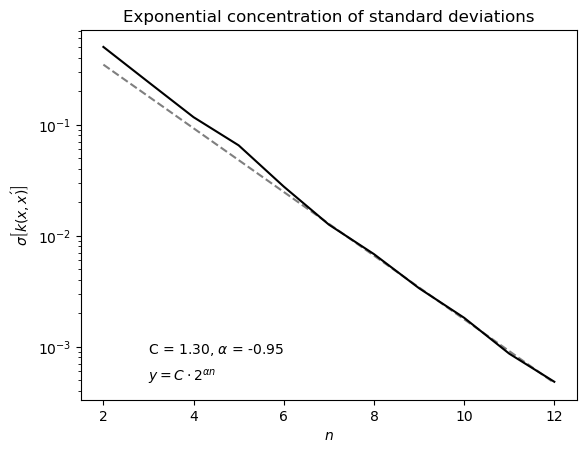

In [35]:
best_starting_qubit = show_all_elbows(iqrs_full, best_qubit = 6)
alpha, C = fit_exponential_n(iqrs_full[2],best_qubit=7)

In [36]:
fit_data = np.zeros((iqrs_full.shape[0],3))

for i in range(iqrs_full.shape[0]):
    alpha, C = fit_exponential_n(iqrs_full[i],best_qubit=7, show_plot=False)

    dot = files[i].find('.')
    underscore = files[i].rfind('_')
    reps = int(files[i][(underscore+1):dot])

    fit_data[i,0] = reps
    fit_data[i,1] = alpha
    fit_data[i,2] = C

df_iqrs_full = pd.DataFrame(fit_data, columns = ['reps', 'alpha', 'C'])
#df_iqrs_full.to_csv(path_2_fit_exports+'iqrs_full.csv', index=False)

# Linear - Full plot

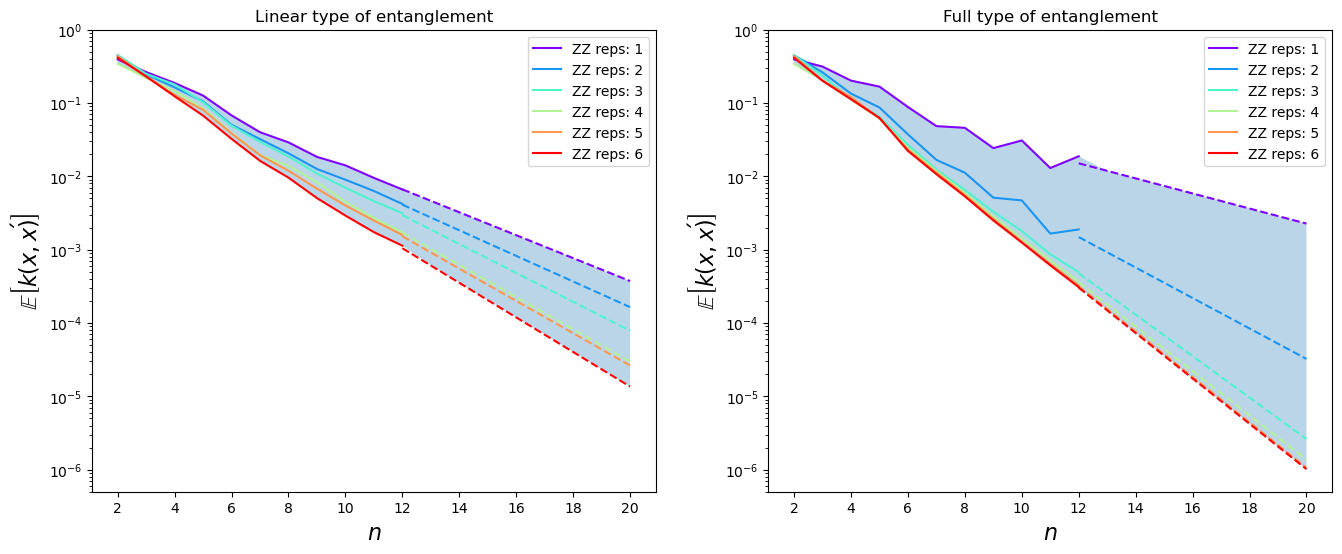

In [39]:
color = cm.rainbow(np.linspace(0, 1, df_full.shape[0]))
max_x = 20
x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
#matplotlib.rcParams.update({'font.size': 18})

for i, c in enumerate(color):
   ax[0].plot(x,means[i], c=c, label = 'ZZ reps: '+str(int(df_means['reps'][i])))
   ax[0].plot(x_extended, df_means['C'][i]*np.power(2.0,df_means['alpha'][i]*x_extended), c=c, linestyle = '--') #here here
   ax[1].plot(x,means_full[i], c=c, label = 'ZZ reps: '+str(int(df_full['reps'][i])))
   ax[1].plot(x_extended, df_full['C'][i]*np.power(2.0,df_full['alpha'][i]*x_extended), c=c, linestyle = '--')

ax[0].fill_between(x_full, np.concatenate((means.max(axis=0), df_means['C'][0]*np.power(2.0,df_means['alpha'][0]*x_extended[1:]))),  np.concatenate(( means.min(axis=0), df_means['C'].iloc[-1]*np.power(2.0,df_means['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
ax[1].fill_between(x_full, np.concatenate((means_full.max(axis=0), df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended[1:]))),  np.concatenate(( means_full.min(axis=0), df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
#plt.fill_between(x_full, np.concatenate((means[0][:-1],df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended))), np.concatenate((means[-1][:-1],df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_title('Linear type of entanglement')
ax[1].set_title('Full type of entanglement')
ax[0].set_xlabel(r'$n$', fontsize=16)
ax[1].set_xlabel(r'$n$', fontsize=16)
ax[0].set_xticks([int(i) for i in x_full if i%2==0])
ax[1].set_xticks([int(i) for i in x_full if i%2==0])
ax[0].set_ylabel(r'$\mathbb{E}\left[k(x,x\')\right]$', fontsize=16)
ax[1].set_ylabel(r'$\mathbb{E}\left[k(x,x\')\right]$', fontsize=16)
ax[0].set_ylim(y_range)
ax[1].set_ylim(y_range)
ax[0].legend()
ax[1].legend()

#plt.savefig('imgs/sonar_means.pdf', transparent = True, bbox_inches='tight')
plt.show()

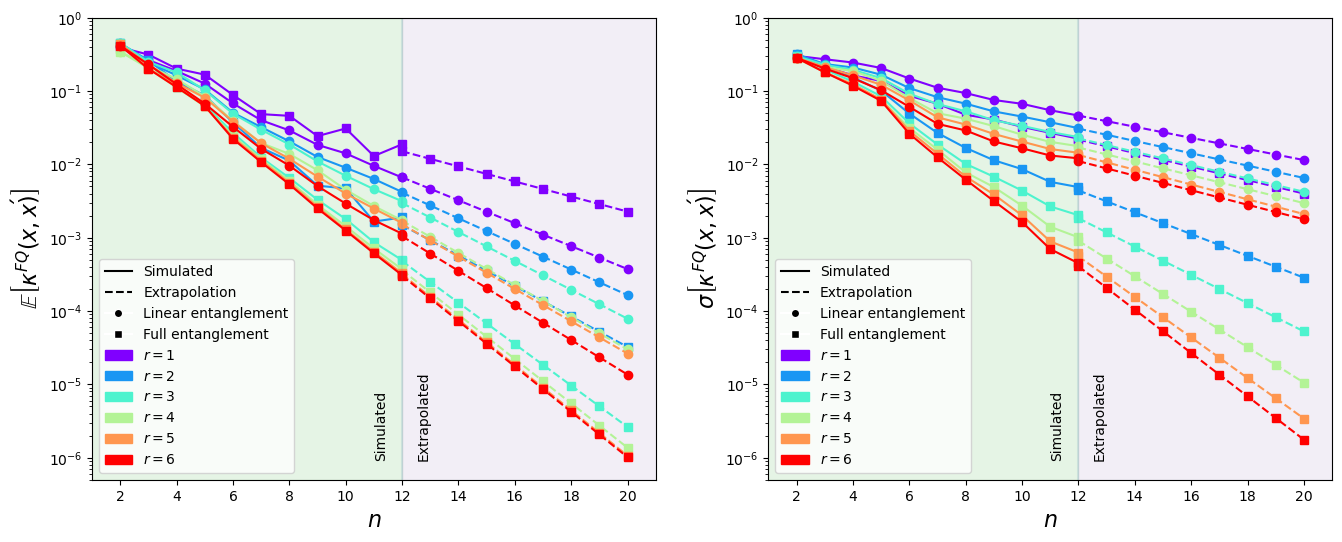

In [40]:
color = cm.rainbow(np.linspace(0, 1, df_full.shape[0]))
bg_color = [plt.cm.Accent(i) for i in range(2)]
max_x = 20
x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

n_limit = 12

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
#matplotlib.rcParams.update({'font.size': 18})

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle='-', label='Simulated'))
legend_entries.append(Line2D([], [], color='black', linestyle='--', label='Extrapolation'))
legend_entries.append( Line2D([], [], color="white", marker='o', markerfacecolor="black", label='Linear entanglement'))
legend_entries.append( Line2D([], [], color="white", marker='s', markerfacecolor="black", label='Full entanglement'))

for i, c in enumerate(color):
   ax[0].plot(x,means[i], c=c, marker='o')
   ax[0].plot(x_extended, df_means['C'][i]*np.power(2.0,df_means['alpha'][i]*x_extended), c=c, marker='o', linestyle = '--')
   ax[0].plot(x,means_full[i], c=c, marker='s')
   ax[0].plot(x_extended, df_full['C'][i]*np.power(2.0,df_full['alpha'][i]*x_extended), c=c, linestyle = '--', marker='s')
   legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )
   
   ax[1].plot(x, stds[i], c=c, marker='o')
   ax[1].plot(x_extended, df_stds['C'][i]*np.power(2.0,df_stds['alpha'][i]*x_extended), c=c, marker='o', linestyle = '--')
   ax[1].plot(x, stds_full[i], c=c, marker='s')
   ax[1].plot(x_extended, df_stds_full['C'][i]*np.power(2.0,df_stds_full['alpha'][i]*x_extended), c=c, linestyle = '--', marker='s')


ax[0].axvline(n_limit, alpha=0.1)
ax[0].axvspan(0, n_limit, alpha=0.2, color=bg_color[0])
ax[0].axvspan(n_limit, 30, alpha=0.2, color=bg_color[1])
ax[0].text(n_limit-1,1.e-6,'Simulated', rotation='vertical')
ax[0].text(n_limit+0.5,1.e-6,'Extrapolated', rotation='vertical')

ax[1].axvline(n_limit, alpha=0.1)
ax[1].axvspan(0, n_limit, alpha=0.2, color=bg_color[0])
ax[1].axvspan(n_limit, 30, alpha=0.2, color=bg_color[1])
ax[1].text(n_limit-1,1.e-6,'Simulated', rotation='vertical')
ax[1].text(n_limit+0.5,1.e-6,'Extrapolated', rotation='vertical')

#ax[0].fill_between(x_full, np.concatenate((means.max(axis=0), df_means['C'][0]*np.power(2.0,df_means['alpha'][0]*x_extended[1:]))),  np.concatenate(( means.min(axis=0), df_means['C'].iloc[-1]*np.power(2.0,df_means['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
#ax[1].fill_between(x_full, np.concatenate((means_full.max(axis=0), df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended[1:]))),  np.concatenate(( means_full.min(axis=0), df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
#plt.fill_between(x_full, np.concatenate((means[0][:-1],df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended))), np.concatenate((means[-1][:-1],df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

#ax[0].set_title('Linear type of entanglement')
#ax[1].set_title('Full type of entanglement')
ax[0].set_xlabel(r'$n$', fontsize=16)
ax[1].set_xlabel(r'$n$', fontsize=16)
ax[0].set_xticks([int(i) for i in x_full if i%2==0])
ax[1].set_xticks([int(i) for i in x_full if i%2==0])

ax[0].set_ylabel(r'$\mathbb{E}\left[\kappa^{FQ}(x,x\')\right]$', fontsize=16)
ax[1].set_ylabel(r'$\sigma\left[\kappa^{FQ}(x,x\')\right]$', fontsize=16)

ax[0].set_ylim(y_range)
ax[0].set_xlim(1,21)
ax[1].set_ylim(y_range)
ax[1].set_xlim(1,21)


ax[0].legend(handles=legend_entries)
ax[1].legend(handles=legend_entries)


#plt.savefig('imgs/sonar_means_stds.pdf', transparent = True, bbox_inches='tight')
plt.show()

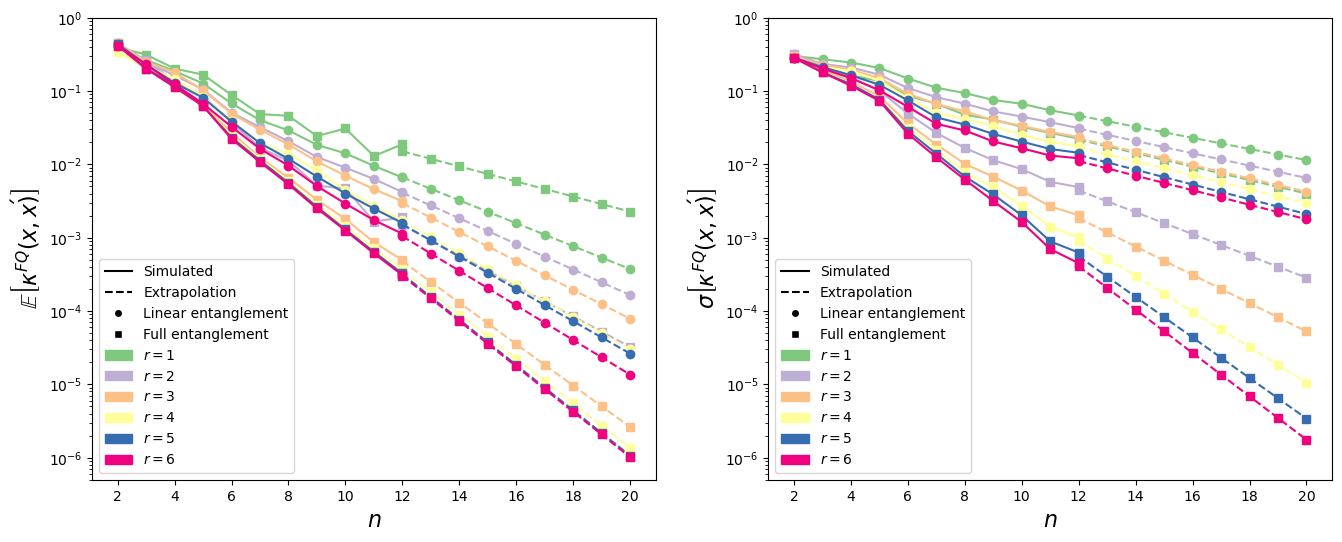

In [41]:
color = cm.rainbow(np.linspace(0, 1, df_full.shape[0]))
color = [plt.cm.Accent(i) for i in range(df_full.shape[0])]
max_x = 20
x_full = np.arange(x[0],max_x+0.1,1)
x_extended = np.arange(x[-1],max_x+0.1,1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
#matplotlib.rcParams.update({'font.size': 18})

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle='-', label='Simulated'))
legend_entries.append(Line2D([], [], color='black', linestyle='--', label='Extrapolation'))
legend_entries.append( Line2D([], [], color="white", marker='o', markerfacecolor="black", label='Linear entanglement'))
legend_entries.append( Line2D([], [], color="white", marker='s', markerfacecolor="black", label='Full entanglement'))

for i, c in enumerate(color):\

   ax[0].plot(x,means[i], c=c, marker='o')
   ax[0].plot(x_extended, df_means['C'][i]*np.power(2.0,df_means['alpha'][i]*x_extended), c=c, marker='o', linestyle = '--')
   ax[0].plot(x,means_full[i], c=c, marker='s')
   ax[0].plot(x_extended, df_full['C'][i]*np.power(2.0,df_full['alpha'][i]*x_extended), c=c, linestyle = '--', marker='s')
   legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )
   
   ax[1].plot(x, stds[i], c=c, marker='o')
   ax[1].plot(x_extended, df_stds['C'][i]*np.power(2.0,df_stds['alpha'][i]*x_extended), c=c, marker='o', linestyle = '--')
   ax[1].plot(x, stds_full[i], c=c, marker='s')
   ax[1].plot(x_extended, df_stds_full['C'][i]*np.power(2.0,df_stds_full['alpha'][i]*x_extended), c=c, linestyle = '--', marker='s')

#ax[0].fill_between(x_full, np.concatenate((means.max(axis=0), df_means['C'][0]*np.power(2.0,df_means['alpha'][0]*x_extended[1:]))),  np.concatenate(( means.min(axis=0), df_means['C'].iloc[-1]*np.power(2.0,df_means['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
#ax[1].fill_between(x_full, np.concatenate((means_full.max(axis=0), df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended[1:]))),  np.concatenate(( means_full.min(axis=0), df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended[1:]) ))  , alpha = 0.3)
#plt.fill_between(x_full, np.concatenate((means[0][:-1],df_full['C'][0]*np.power(2.0,df_full['alpha'][0]*x_extended))), np.concatenate((means[-1][:-1],df_full['C'].iloc[-1]*np.power(2.0,df_full['alpha'].iloc[-1]*x_extended))), alpha = 0.3)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

#ax[0].set_title('Linear type of entanglement')
#ax[1].set_title('Full type of entanglement')
ax[0].set_xlabel(r'$n$', fontsize=16)
ax[1].set_xlabel(r'$n$', fontsize=16)
ax[0].set_xticks([int(i) for i in x_full if i%2==0])
ax[1].set_xticks([int(i) for i in x_full if i%2==0])
ax[0].set_ylabel(r'$\mathbb{E}\left[\kappa^{FQ}(x,x\')\right]$', fontsize=16)
ax[1].set_ylabel(r'$\sigma\left[\kappa^{FQ}(x,x\')\right]$', fontsize=16)
ax[0].set_ylim(y_range)
ax[1].set_ylim(y_range)
ax[0].legend(handles=legend_entries)
ax[1].legend(handles=legend_entries)


#plt.savefig('imgs/sonar_means_stds.pdf', transparent = True, bbox_inches='tight')
plt.show()